# Exercise 6

## SVM & Regularization


For this homework we consider a set of observations on a number of red and white wine varieties involving their chemical properties and ranking by tasters. Wine industry shows a recent growth spurt as social drinking is on the rise. The price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Pricing of wine depends on such a volatile factor to some extent. Another key factor in wine certification and quality assessment is physicochemical tests which are laboratory-based and takes into account factors like acidity, pH level, presence of sugar and other chemical properties. For the wine market, it would be of interest if human quality of tasting can be related to the chemical properties of wine so that certification and quality assessment and assurance process is more controlled.

Two datasets are available of which one dataset is on red wine and have 1599 different varieties and the other is on white wine and have 4898 varieties. All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

A predictive model developed on this data is expected to provide guidance to vineyards regarding quality and price expected on their produce without heavy reliance on volatility of wine tasters.

In [1108]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, Ridge, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [1109]:
data_r = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_red.csv')
data_w = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_white.csv')

In [1110]:
data = data_w.assign(type = 'white')

data = data.append(data_r.assign(type = 'red'), ignore_index=True)
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3979,6.5,0.290,0.52,1.7,0.034,41.0,193.0,0.99223,3.25,0.59,10.4,6,white
6462,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,red
4178,5.8,0.190,0.33,4.2,0.038,49.0,133.0,0.99107,3.16,0.42,11.3,7,white
4554,6.0,0.230,0.34,1.3,0.025,23.0,111.0,0.98961,3.36,0.37,12.7,6,white
1367,7.6,0.270,0.24,3.8,0.058,19.0,115.0,0.99580,3.15,0.45,8.9,5,white


# Exercise 6.1

Show the frecuency table of the quality by type of wine

In [1111]:
data.groupby(["type","quality"]).count()["pH"]

type   quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

Text(0,0.5,'Cantidad')

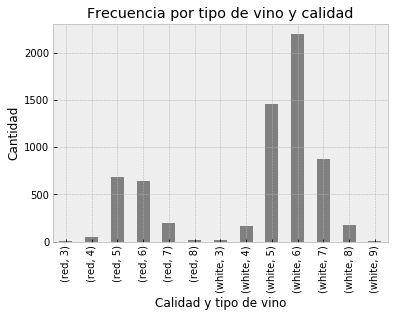

In [1112]:
counts.plot(kind="bar", title="Frecuencia por tipo de vino y calidad", color=["gray"])

plt.xlabel("Calidad y tipo de vino") 
plt.ylabel("Cantidad")

# SVM (Support Vector Machines)

# Exercise 6.2

* Standarized the features (not the quality)
* Create a binary target for each type of wine
* Create two Linear SVM's for the white and red wines, repectively.


### Estandarizar las caracteristicas, excepto la calidad

In [1113]:
data_w[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] = StandardScaler().fit_transform(data_w[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
data_r[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] = StandardScaler().fit_transform(data_r[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

In [1114]:
data["type"].value_counts()

white    4898
red      1599
Name: type, dtype: int64

### Para los vinos Rojos

In [1115]:
data_r['quality_bin'] = data_r['quality'] >6

In [1116]:
data_r["quality_bin"].value_counts()

False    1382
True      217
Name: quality_bin, dtype: int64

Text(0,0.5,'Cantidad')

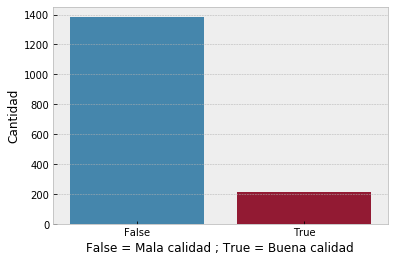

In [1117]:
sns.countplot(data_r['quality_bin'])
plt.xlabel("False = Mala calidad ; True = Buena calidad") 
plt.ylabel("Cantidad")

In [1118]:
X_red = data_r.drop(["quality","quality_bin"], axis = 1)
y_red = data_r["quality_bin"]

In [1119]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X_red, y_red)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Para los vinos Blancos

In [1120]:
data_w['quality_bin'] = data_w['quality'] >6

In [1121]:
data_w["quality_bin"].value_counts()

False    3838
True     1060
Name: quality_bin, dtype: int64

Text(0,0.5,'Cantidad')

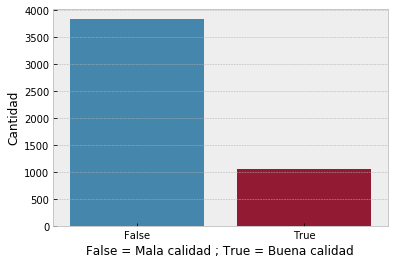

In [1122]:
sns.countplot(data_w['quality_bin'])
plt.xlabel("False = Mala calidad ; True = Buena calidad") 
plt.ylabel("Cantidad")

In [1123]:
X_whi = data_w.drop(["quality","quality_bin"], axis = 1)
y_whi = data_w['quality_bin']

In [1124]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X_whi, y_whi)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Exercise 6.3

Test the two SVM's using the different kernels (‘poly’, ‘rbf’, ‘sigmoid’)


### Poly para vino Rojo

In [1125]:
X_red_train,X_red_test,y_red_train,y_red_test=train_test_split(X_red,y_red)

In [1126]:
clf_poly = SVC(kernel='poly')
clf_poly.fit(X_red_train, y_red_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1127]:
pred_clf_poly = clf_poly.predict(X_red_test)
print(classification_report(y_red_test, pred_clf_poly))

             precision    recall  f1-score   support

      False       0.87      0.98      0.92       338
       True       0.65      0.21      0.32        62

avg / total       0.84      0.86      0.83       400



In [1128]:
accuracies = cross_val_score(estimator = clf_poly, X=X_red_train, y=y_red_train, cv=10)
accuracies.mean()

0.8874166030048384

In [1129]:
accuracies.std()

0.021725404469924773

In [1130]:
clf_poly.score(X_red_test, y_red_test)

0.86

### Poly para vino Blanco

In [1131]:
X_whi_train,X_whi_test,y_whi_train,y_whi_test=train_test_split(X_whi,y_whi)

In [1132]:
clf_poly = SVC(kernel='poly')
clf_poly.fit(X_whi_train, y_whi_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1133]:
pred_clf_poly = clf_poly.predict(X_whi_test)
print(classification_report(y_whi_test, pred_clf_poly))

             precision    recall  f1-score   support

      False       0.80      0.98      0.88       943
       True       0.70      0.17      0.27       282

avg / total       0.77      0.79      0.74      1225



In [1134]:
accuracies = cross_val_score(estimator = clf_poly, X=X_whi_train, y=y_whi_train, cv=10)
accuracies.mean()

0.8088757798424681

In [1135]:
accuracies.std()

0.014133160412440738

In [1136]:
clf_poly.score(X_whi_test, y_whi_test)

0.7918367346938775

### rbf para vino Rojo

In [1137]:
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_red_train, y_red_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1138]:
pred_clf_rbf = clf_rbf.predict(X_red_test)
print(classification_report(y_red_test, pred_clf_rbf))

             precision    recall  f1-score   support

      False       0.86      0.98      0.92       338
       True       0.62      0.16      0.26        62

avg / total       0.83      0.85      0.82       400



In [1139]:
accuracies = cross_val_score(estimator = clf_rbf, X=X_red_train, y=y_red_train, cv=10)
accuracies.mean()

0.8931877213695396

In [1140]:
accuracies.std()

0.01885242043028057

In [1141]:
clf_rbf.score(X_red_test, y_red_test)

0.855

### rbf para vino Blanco

In [1142]:
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_whi_train, y_whi_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1143]:
pred_clf_rbf = clf_rbf.predict(X_whi_test)
print(classification_report(y_whi_test, pred_clf_rbf))

             precision    recall  f1-score   support

      False       0.83      0.96      0.89       943
       True       0.71      0.32      0.44       282

avg / total       0.80      0.81      0.79      1225



In [1144]:
accuracies = cross_val_score(estimator = clf_rbf, X=X_whi_train, y=y_whi_train, cv=10)
accuracies.mean()

0.8273948333433678

In [1145]:
accuracies.std()

0.012489032036327096

In [1146]:
clf_rbf.score(X_whi_test, y_whi_test)

0.8130612244897959

### Sigmoid para vino Rojo

In [1147]:
clf_sig = SVC(kernel='sigmoid')
clf_sig.fit(X_red_train, y_red_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1148]:
pred_clf_sig = clf_sig.predict(X_red_test)
print(classification_report(y_red_test, pred_clf_sig))

             precision    recall  f1-score   support

      False       0.87      0.93      0.90       338
       True       0.39      0.26      0.31        62

avg / total       0.80      0.82      0.81       400



In [1149]:
accuracies = cross_val_score(estimator = clf_sig, X=X_red_train, y=y_red_train, cv=10)
accuracies.mean()

0.8466715281153785

In [1150]:
accuracies.std()

0.04554600262499452

In [1151]:
clf_sig.score(X_red_test, y_red_test)

0.8225

### Sigmoid para vino Blanco

In [1152]:
clf_sig = SVC(kernel='sigmoid')
clf_sig.fit(X_whi_train, y_whi_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1153]:
pred_clf_sig = clf_sig.predict(X_whi_test)
print(classification_report(y_whi_test, pred_clf_sig))

             precision    recall  f1-score   support

      False       0.80      0.83      0.81       943
       True       0.34      0.29      0.32       282

avg / total       0.69      0.71      0.70      1225



In [1154]:
accuracies = cross_val_score(estimator = clf_sig, X=X_whi_train, y=y_whi_train, cv=10)
accuracies.mean()

0.7479031325115573

In [1155]:
accuracies.std()

0.012222334754644914

In [1156]:
clf_sig.score(X_whi_test, y_whi_test)

0.7077551020408164

# Exercise 6.4
Using the best SVM find the parameters that gives the best performance

'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]

### El mejor SVM fue: "rbf para vino Rojo"

In [1157]:
param = {
    'C': [0.1,1,10,100,1000],
    'kernel':["rbf"],
    'gamma' :[0.01,0.001,0.0001]
}
best_svm = GridSearchCV(clf_rbf, param_grid=param, scoring='accuracy', cv=10)

In [1158]:
best_svm.fit(X_red_train, y_red_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [1159]:
best_svm.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [1160]:
best_svm.best_score_

0.890742285237698

# Exercise 6.5

Compare the results with other methods

### El score correspondiente al último modelo realizado es más efectivo basados en los resultados anteriores.

# Regularization

# Exercise 6.6


* Train a linear regression to predict wine quality (Continous)

* Analyze the coefficients

* Evaluate the RMSE

### Entrenar la regresión lineal multiple para la predicción de la calidad del vino

In [1161]:
X_wine = data.drop(['type', 'quality'], axis=1)
y_wine = data['quality']

In [1162]:
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine)

In [1163]:
linearreg = LinearRegression()
linearreg.fit(X_wine_train, y_wine_train)
y_wine_pred = linearreg.predict(X_wine_test)

print(linearreg.coef_)

[ 6.16327949e-02 -1.42650512e+00 -1.87712524e-01  4.07368457e-02
 -5.98631369e-01  5.26545541e-03 -2.42732750e-03 -4.99995060e+01
  3.64460459e-01  8.45906152e-01  2.65325898e-01]


### Analisis de coeficientes:
5 coeficientes hacen que el vino disminuya la calidad
6 coeficientes hacen que el vino incremente la calidad 

### Evaluar RMSE

In [1164]:
print(np.sqrt(metrics.mean_squared_error(y_wine_test, y_wine_pred)))

0.726169911754875


# Exercise 6.7

* Estimate a ridge regression with alpha equals 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

### Estimar regresión Ridge con a= 0.1

In [1165]:
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_wine_train, y_wine_train)
y_wine_pred = ridgereg.predict(X_wine_test)
print(ridgereg.coef_)

[ 2.71515706e-02 -1.24391612e+00 -4.90696404e-02  2.51336619e-02
 -1.09120460e+00  3.99122050e-03 -1.79476718e-03 -2.93310766e+01
  2.04577553e-01  7.27534679e-01  2.54500702e-01]


In [1166]:
print(np.sqrt(metrics.mean_squared_error(y_wine_test, y_wine_pred)))

0.7288907415495752


### Estimar regresión Ridge con a= 1

In [1167]:
ridgereg = Ridge(alpha=1, normalize=True)
ridgereg.fit(X_wine_train, y_wine_train)
y_wine_pred = ridgereg.predict(X_wine_test)
print(ridgereg.coef_)

[-3.24682328e-04 -6.15680379e-01  1.48011381e-01  5.19260448e-03
 -1.37480838e+00  1.31050457e-03 -5.89969890e-04 -2.27925671e+01
  6.73303909e-02  3.40516562e-01  1.36257651e-01]


In [1168]:
print(np.sqrt(metrics.mean_squared_error(y_wine_test, y_wine_pred)))

0.7623895881535032


### Análisis de coeficientes
Los coeficientes con a=0.1 son similares a los realizados en la regresión lineal, sin embargo, cuando se modifica el alfa en la regresión Ridge a 1, los coeficientes son bastante distantes de los presentados anteriormente.

# Exercise 6.8

* Estimate a lasso regression with alpha equals 0.01, 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

### Estimar regresión Lasso con a= 0.01

In [1169]:
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_wine_train, y_wine_train)
y_pred = lassoreg.predict(X_wine_test)
print(lassoreg.coef_)

[-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.]


In [1170]:
print(np.sqrt(metrics.mean_squared_error(y_wine_test, y_wine_pred)))

0.7623895881535032


### Estimar regresión Lasso con a= 0.1

In [1171]:
lassoreg = Lasso(alpha=0.1, normalize=True)
lassoreg.fit(X_wine_train, y_wine_train)
y_pred = lassoreg.predict(X_wine_test)
print(lassoreg.coef_)

[-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.]


In [1172]:
print(np.sqrt(metrics.mean_squared_error(y_wine_test, y_wine_pred)))

0.7623895881535032


### Estimar regresión Lasso con a= 1

In [1173]:
lassoreg = Lasso(alpha=1, normalize=True)
lassoreg.fit(X_wine_train, y_wine_train)
y_pred = lassoreg.predict(X_wine_test)
print(lassoreg.coef_)

[-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.]


In [1174]:
print(np.sqrt(metrics.mean_squared_error(y_wine_test, y_wine_pred)))

0.7623895881535032


### Análisis de coeficientes
Los resultados son diametralmente opuestos a los calculados en la regresión lineal son exactamente iguales en los tres casos y de igual manera el RMSE

# Exercise 6.9

* Create a binary target

* Train a logistic regression to predict wine quality (binary)

* Analyze the coefficients

* Evaluate the f1score

In [1175]:
logisticreg = LogisticRegression()
logisticreg.fit(X_wine_train, y_wine_train)
y_wine_prob = logisticreg.predict_proba(X_wine_test)
print(logisticreg.coef_)

[[ 2.19287177e-01  2.21923477e+00 -4.67971705e-01 -9.77437320e-02
   2.94738944e-01  2.93503520e-02 -1.61442056e-03 -5.17574361e-01
  -5.91883027e-01 -1.09295449e+00 -4.18607449e-01]
 [-7.89996739e-02  2.41074684e+00 -6.11663482e-02 -3.93569977e-02
  -3.59318328e-01 -6.03156679e-02  8.31826526e-03  1.82471466e-01
   2.67379208e-01 -2.45477118e+00 -2.76821057e-01]
 [ 4.75793520e-02  3.16769526e+00  5.44658858e-01 -4.22355968e-02
   1.25212345e+00 -1.09879067e-02  6.86154241e-03  2.75026645e+00
   4.60505727e-01 -1.32365064e+00 -8.65573703e-01]
 [-2.75787156e-03 -2.16909683e+00 -4.52128753e-01  2.11128788e-02
   1.03228205e-02  5.13858853e-03 -3.70010051e-03 -3.32372308e-01
  -4.25353963e-02  5.43641701e-01  1.27174632e-01]
 [ 1.16144663e-02 -3.63790419e+00 -3.59855701e-01  2.87046696e-02
  -1.60523479e+00  7.82832627e-03 -4.90864922e-03 -3.70515610e+00
  -3.61173940e-01  1.59797328e+00  6.95284831e-01]
 [-3.40462098e-01 -1.88237394e+00  1.67375833e-01  6.19199973e-02
  -3.94804872e-01  

# Exercise 6.10

* Estimate a regularized logistic regression using:
* C = 0.01, 0.1 & 1.0
* penalty = ['l1, 'l2']
* Compare the coefficients and the f1score

In [1176]:
ss = StandardScaler()
X_train = X_wine_train.astype(float)
X_test = X_wine_test.astype(float)
ss.fit(X_wine_train)
X_wine_train_ss = ss.transform(X_wine_train)
X_wine_test_ss = ss.transform(X_wine_test)

In [1177]:
logisticreg1 = LogisticRegression(C=0.01, penalty='l1',solver='liblinear')
logisticreg1.fit(X_wine_train_ss, y_wine_train)
print(logisticreg1.coef_)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.07951     0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.34606004  0.          0.          0.          0.
   0.          0.          0.         -0.03669701 -0.84652743]
 [ 0.         -0.19593807  0.          0.          0.          0.
   0.          0.          0.          0.          0.0763935 ]
 [ 0.         -0.25305135  0.          0.          0.          0.
   0.          0.          0.          0.05803647  0.64841638]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.14984645]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]


In [1178]:
logisticreg2 = LogisticRegression(C=0.1, penalty='l1',solver='liblinear')
logisticreg2.fit(X_wine_train_ss, y_wine_train)
print(logisticreg2.coef_)

[[ 0.          0.43966176  0.          0.          0.04566766  0.28135052
   0.          0.          0.          0.          0.        ]
 [ 0.          0.44627213  0.          0.         -0.07919807 -0.68465217
   0.14598825 -0.13249807  0.         -0.38295935 -0.32144416]
 [-0.01205289  0.51731347  0.06186825 -0.25163349  0.06330693 -0.15485314
   0.32427264  0.09094037 -0.02657284 -0.21195858 -1.00362389]
 [-0.04474862 -0.39097591 -0.06737128  0.          0.          0.06084659
  -0.15184988  0.15700087 -0.01717432  0.04850832  0.22299663]
 [ 0.20872915 -0.5841847  -0.0262795   0.25301975 -0.22864681  0.08174007
  -0.17909217 -0.17680775  0.15433905  0.2776693   0.77949223]
 [-0.04475338 -0.31074389  0.          0.21671811 -0.04394617  0.15569901
   0.          0.          0.          0.          0.86346777]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]


In [1179]:
logisticreg3 = LogisticRegression(C=1, penalty='l1',solver='liblinear')
logisticreg3.fit(X_wine_train_ss, y_wine_train)
print(logisticreg3.coef_)

[[ 0.63352123  0.59547128  0.         -0.01191729  0.3563947   0.46222919
   0.17419236 -0.20619575  0.36734439 -0.68021761 -0.07127517]
 [ 0.02215937  0.57591286  0.06885882  0.         -0.20374869 -0.99918421
   0.34807866 -0.36720072  0.10812457 -0.44363568 -0.58124321]
 [-0.1694671   0.51031046  0.08567649 -0.46248192  0.05432807 -0.19037952
   0.38672216  0.39267532 -0.12129347 -0.25891737 -0.89623365]
 [-0.15796594 -0.43967158 -0.08304628 -0.12761474 -0.01212339  0.08622602
  -0.17079979  0.38812536 -0.09532136  0.03881707  0.33766712]
 [ 0.48458132 -0.59744164 -0.07417473  0.61142019 -0.21380195  0.13374804
  -0.28653173 -0.67865349  0.32086394  0.35067288  0.60197128]
 [ 0.09761484 -0.46800936  0.          0.72175659 -0.13768905  0.27119526
  -0.21413517 -0.50604764  0.15179237  0.15255772  0.78763774]
 [ 0.74961825  0.          0.11985904  0.         -1.98042381  0.05970216
   0.         -0.0414746   0.74763714 -0.1543721   0.68208682]]


In [1180]:
logisticreg1 = LogisticRegression(C=0.01, penalty='l2',solver='liblinear')
logisticreg1.fit(X_wine_train_ss, y_wine_train)
print(logisticreg1.coef_)

[[ 0.04228547  0.0765002  -0.00533821 -0.01875835  0.03632543  0.06864319
   0.01910352 -0.00897353  0.02000189 -0.03607368 -0.00191229]
 [-0.01901327  0.22129104 -0.0061491  -0.04957314 -0.04873955 -0.20168689
   0.0432948  -0.04326534  0.00116742 -0.13542529 -0.13725939]
 [-0.07637057  0.42617491  0.03925781 -0.2660061   0.09452295 -0.12492464
   0.27746757  0.23903873 -0.07197574 -0.20565121 -0.75397583]
 [-0.04136266 -0.34000357 -0.05547513  0.02408628 -0.009622    0.06457956
  -0.1504939   0.10399194 -0.02170539  0.06254698  0.18854416]
 [ 0.15584722 -0.35132746  0.00709251  0.1871752  -0.16980227  0.07840033
  -0.15126599 -0.22753901  0.11703741  0.21999233  0.54295706]
 [-0.01975826 -0.05792166  0.01188801  0.11384365 -0.03610763  0.07251446
  -0.03707293 -0.09842644  0.0121857   0.0285614   0.25140798]
 [ 0.01121421  0.00176311  0.00707298  0.00461599 -0.00672378  0.00405767
   0.00110704 -0.01158051  0.01265636 -0.00562513  0.01401354]]


In [1181]:
logisticreg2 = LogisticRegression(C=0.1, penalty='l2',solver='liblinear')
logisticreg2.fit(X_wine_train_ss, y_wine_train)
print(logisticreg2.coef_)

[[ 0.23613313  0.3203429  -0.00988519 -0.05266894  0.15133123  0.26714955
   0.08904683 -0.09334836  0.12120359 -0.20393234 -0.02655151]
 [-0.0143791   0.48061565  0.0486429  -0.06209186 -0.1623497  -0.67316365
   0.22727727 -0.2116225   0.05014453 -0.34906654 -0.41217412]
 [-0.15602291  0.50258461  0.08135723 -0.43369814  0.06133089 -0.18415379
   0.37420137  0.36636119 -0.11389924 -0.25316755 -0.88197495]
 [-0.13482811 -0.42596674 -0.080661   -0.09608018 -0.01176952  0.0862033
  -0.1736082   0.33254028 -0.08177821  0.04560077  0.30929072]
 [ 0.38559751 -0.56557193 -0.06101514  0.47738882 -0.22739449  0.12856122
  -0.26009715 -0.50095992  0.26005322  0.32079771  0.63825865]
 [ 0.02058941 -0.25780785  0.00932572  0.43885074 -0.09561557  0.20961185
  -0.1514177  -0.29566035  0.08030124  0.09948455  0.61250829]
 [ 0.08864342  0.01565855  0.0421202   0.04574632 -0.04440459  0.02698879
   0.00616745 -0.08956067  0.09159289 -0.03655882  0.0729168 ]]


In [1182]:
logisticreg3 = LogisticRegression(C=1, penalty='l2',solver='liblinear')
logisticreg3.fit(X_wine_train_ss, y_wine_train)
print(logisticreg3.coef_)

[[ 0.70138915  0.56101135 -0.0228401   0.06108897  0.33713621  0.41732971
   0.20193455 -0.44841104  0.41576497 -0.57609189 -0.20998202]
 [ 0.08789092  0.58129244  0.07448247  0.05960521 -0.20291658 -0.9804582
   0.34416383 -0.4795491   0.15294369 -0.4278585  -0.63329725]
 [-0.18335288  0.50907117  0.08764739 -0.47995654  0.05425635 -0.19332628
   0.39163754  0.41888783 -0.12970894 -0.262978   -0.88482381]
 [-0.17252966 -0.44433572 -0.08412713 -0.14644379 -0.01568303  0.08898542
  -0.17184239  0.41833638 -0.10535873  0.03744833  0.35126624]
 [ 0.49783296 -0.59662085 -0.07782281  0.62733052 -0.21563135  0.13857735
  -0.29395071 -0.70098856  0.32865392  0.35396696  0.5922314 ]
 [ 0.16904309 -0.44243801 -0.00308787  0.78996895 -0.1401363   0.28426542
  -0.24962998 -0.62386293  0.19358443  0.16674115  0.7097026 ]
 [ 0.60044156  0.09113707  0.16547409  0.32457498 -0.49898328  0.14162162
  -0.03103776 -0.56345807  0.57029561 -0.17994409  0.21563657]]
